# Algoritmos de Estocásticos de Optimización: Algoritmos Genéticos

Este cuaderno presenta un ejemplo de la implementación del algoritmo genético estándar. Primero se escriben las funciones auxiliares de codificación, selección, y operadores sobre los cromosomas, para finalizar con el algoritmo estándar.

## 1. Esquemas de codificación

### Codificación binaria

In [2]:
import numpy as np

#Codificación binaria:
nGenes = 20

cromosoma_binario = np.random.randint(2, size=nGenes)
print(cromosoma_binario)

[0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0]


Las variables se decodifican usando, por ejemplo:
$$
x = -d + \dfrac{2d}{1 - 2^{-k}}(2^{-1}g_1 + \ldots + 2^{-k}g_k)
$$

Lo que resulta en un valor $x \in [-d,d]$

### Codificación real

In [2]:
# Codificación real

nGenes = 20

cromosoma_real = np.random.random(nGenes)
print(cromosoma_real)

[0.87463835 0.12700453 0.29854245 0.37519195 0.79773138 0.6626623
 0.9713867  0.90341332 0.73251929 0.72411121 0.94864205 0.80645737
 0.76856586 0.86615755 0.01764807 0.34294883 0.03328145 0.85529709
 0.99623573 0.80170712]


Decodificación:
$$
x_i = -d + 2dg_i
$$

## 2. Selección de individuos

### Selección por ruleta

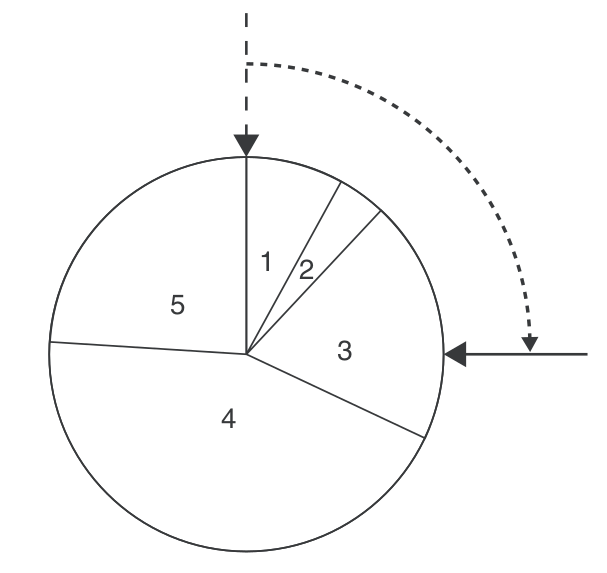

Fuente: Wahde (2008).

Seleccione al individuo con el $j$ más pequeño que satisfaga:
$$
\phi_j = \dfrac{\sum_{i=1}^{j}F_i}{\sum_{i=1}^N F_i} > r
$$
donde $r$ es un número aleatorio uniforme entre 0 y 1.

In [19]:
def SelecciónRuleta(población):
    """
    Escriba una función que a partir de la población de individios seleccione uno por 
    medio de una ruleta.
    """
    phiJ = []
    r = np.random.random()
    #Tomaremos la poblacion como el conjunto de F
    terminoAbajo = np.sum(población)
    for i in range(población.size):
        phiJ += [np.sum(población[:i+1]) / terminoAbajo]
    contadorPhi = 0
    seleccionado = 0
    for phi in phiJ:
        if phi > r:
            seleccionado = contadorPhi
            break;
        else:
            contadorPhi += 1
    individuoSeleccionado = población[seleccionado]
    return individuoSeleccionado





[2 3 4]


### Torneo de selección

1. Se seleccionan dos individuos de la población con probabilidad uniforme.
2. Con probabilidad $p_{torneo}$ se selecciona al que tenga el valor de ajuste más alto.

* Se puede generalizar a torneos más grandes.
* El proceso selecciona **un** individuo.
* Los individuos seleccionados vuelven al conjunto y pueden volver a ser selecionados.

In [4]:


def TorneoSelección(valoresAjuste, p_torneo):
    """
    Escriba una función que a partir de la población de individios seleccione uno por 
    medio de un torneo de selección.
    Se toman como entradas el arreglo de valores de ajuste y la probabilidad del torneo de selección.
    Se retorna el índice del individuo seleccionado
    """
    sobrevivientes = np.copy(valoresAjuste)
    r = np.random.random()
    while(sobrevivientes.size != 1):
        seleccionado1 = np.random.randint(0, sobrevivientes.size)
        seleccionado2 = np.random.randint(0, sobrevivientes.size)
        while(seleccionado2 == seleccionado1):
            seleccionado2 = np.random.randint(0, sobrevivientes.size)
        if r < p_torneo:
            if valoresAjuste[seleccionado2] > valoresAjuste[seleccionado1]:
                sobrevivientes = np.delete(sobrevivientes, seleccionado1)
            else:
                sobrevivientes = np.delete(sobrevivientes, seleccionado2)
        else:
            if valoresAjuste[seleccionado2] > valoresAjuste[seleccionado1]:
                sobrevivientes = np.delete(sobrevivientes, seleccionado2)
            else:
                sobrevivientes = np.delete(sobrevivientes, seleccionado1)
    individuo_seleccionado = sobrevivientes[0]
    return individuo_seleccionado

## 3. Operador de cruce

Se lleva a cabo con una probabilidad $p_{cruce}$. Si no, no se hace el cruce.

In [21]:
def OperadorCruce(individuo1, individuo2, p_cruce):
    """
    Escriba una función que cruce un par de cromosomas en una posición aleatoria.
    Se toman como entradas dos arreglos que representan un par de cromosomas y 
    la probabilidad de realizar el cruce.
    El punto de corte debe seleccionarse aleatoriamente según la longitud de los cromosomas
    Se retornan los nuevos cromosomas generados
    """
    r = np.random.random()
    seleccionadorPosicion = np.random.randint(1, individuo1.size-1)
    individuoNuevo1 = np.copy(individuo1)
    individuoNuevo2 = np.copy(individuo2)
    if r < p_cruce:
        individuoNuevo1[0:seleccionadorPosicion] = individuo2[0:seleccionadorPosicion]
        individuoNuevo2[0:seleccionadorPosicion] = individuo1[0:seleccionadorPosicion]
    return individuoNuevo1, individuoNuevo2



## 4. Operador de Mutación

* Probabilidad de mutación $p_{mutación}$.
* Típicamente $p_{mut} = \frac{1}{m}$ donde $m$ es el número de genes.
* En caso de genes binarios, se cambia el valor del gen.
* En caso de genes reales, se escoge un nuevo valor con una distribución uniforme centrada en el valor anterior del gen.

In [6]:
def OperadorMutación(cromosoma, p_mut):
    """
    Escriba una función que realice la mutación de un cromosoma con probabilidad p_mut
    """
    nGenes = len(cromosoma)
    cromosomaMutado = np.copy(cromosoma)

    # Analice la implementación del operador mutación
    for iPos in range(nGenes):
        nAleatorio = np.random.random()

        if nAleatorio < p_mut:
            cromosomaMutado[iPos] = 1 - cromosoma[iPos]

    return cromosomaMutado

## 6. Operador de Reemplazo

* Reemplazo generacional: $N$ nuevos individuos son formados, tal que reemplazen los $N$ individuos viejos.
* Reemplazo "steady-state": Se forman nuevos individuos por pares y se reemplazan los peores individuos de la población.

## 7. Operador de Elitismo

* Una copia del mejor cromosoma de la problación se mantiene sin cambios en la próxima generación.
* Este proceso asegura que el máximo valor de ajuste va a aumentar constantemente.
* Además asegura que el mejor individuo de todas las generaciones se mantiene entre la población.

# Ejemplo de curva de valores de ajuste

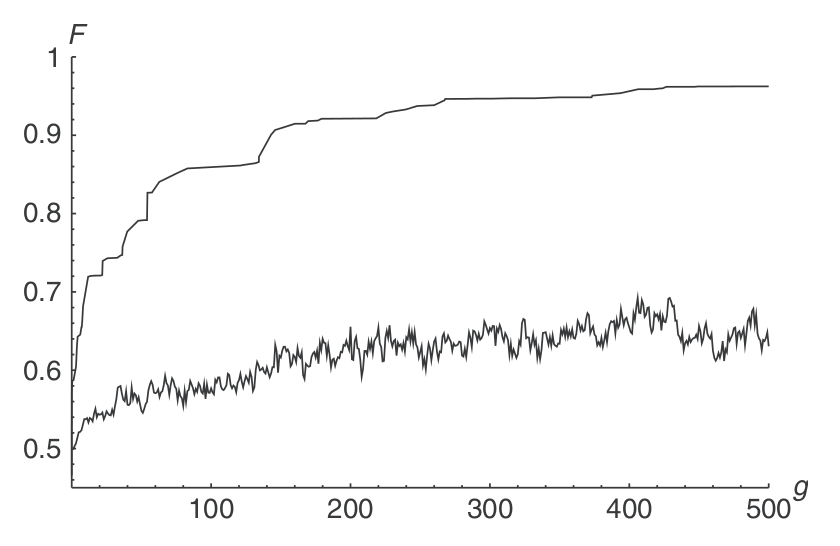

Fuente: Wahde (2008). Ejecución de un AG estándar con una población de 100 individuos.

# Algoritmo Genético Estándar

1. Inicialice la población. Genere $N$ secuencias binarias aleatorias (cromosomas) $c_i$, donde $i = 1, \cdots, N$, de longitud $m$. 

2. Evalúe los individuos:

    2.1. Decodifique los cromosomas $c_i$ para obtener las variables correspondientes $x_{ij}$, donde $j = 1, \ldots, n$ y $n$ es el número de variables a evaluar.
    
    2.2. Evalúe la función objetivo o de ajuste usando las variables obtenidas en el paso anterior, y asigne un valor de ajuste $F_i = f(\mathbf{x}_i)$.
    
    2.3. Repita los pasos 2.1. y 2.2. hasta que la población entera haya sido evaluada.
    
    2.4. Defina: 
    $$i_{max} \leftarrow 1$$
    $$F_{max} \leftarrow F_i$$
    
      Luego itere sobre todos los individuos y si $F_i > F_{max}$ defina:
    $$F_{max} \leftarrow F_i$$
    $$i_{max} \leftarrow i$$
    
3. Forme la próxima generación:

    3.1. Haga una copia del mejor cromosoma $c_{i_{max}}$.
    
    3.2. Seleccione dos individuos $i_1$ e $i_2$ de la población  usando un método de selección adecuado.
    
    3.3. Genere dos nuevos cromosomas cruzando, con probabilidad $p_{cruce}$ los cromosomas seleccionados en el paso anterior. Con probabilidad $1 - p_{cruce}$ returne los cromosomas viejos sin cambios.
    
    3.4. Haga mutaciones en los cromosomas generados.
    
    3.5. Repita los pasos 3.2-3.4 hasta que $N - 1$ cromosomas adicionales se hayan generado. Reemplace los cromosomas viejos por los nuevos.
    
    
4. Regrese al paso 2 hasta que el criterio de terminación sea alcanzado.

## Inicialización de la población

In [7]:
def InicializarPoblación(tamañoPoblación, nGenes):
    """
    Inicializa la población de individuos para la optimización. 
    Los cromosomas tienen una codificación binaria
    Se toma como entrada el tamaño de la población y el número de genes por cromosoma
    Se retorna la matriz 'tamaño población x nGenes' que representa la población inicial
    """

    return población

## Decodificación del cromosoma

In [8]:
def DecodificaciónCromosoma(cromosoma, rangoVariables):
    """
    Operación de decodificación de un cromosoma.
    Se toma un cromosoma binario y el rango de las variables
    Se retorna el arreglo de variables reales decodificadas
    """

    nGenes = len(cromosoma)
    puntoMedio = int(np.floor(nGenes/2))

    valoresVariables = np.zeros(2)

    # Punto medio es la posición que separa las variables 'x' y 'y'
    for jPos in range(puntoMedio):
        valoresVariables[0] += cromosoma[jPos]*(2^(-jPos))
    
    # Se almacena el valor de x
    valoresVariables[0] = -rangoVariables + 2*rangoVariables*valoresVariables[0]/(1 - 2^(-puntoMedio))

    for kPos in range(puntoMedio):
        valoresVariables[1] += cromosoma[kPos + puntoMedio]*(2^(-kPos))

    # Se almacena el valor de y
    valoresVariables[1] = -rangoVariables + 2*rangoVariables*valoresVariables[1]/(1 - 2^(-puntoMedio))

    return valoresVariables

## Evaluación

In [9]:
def EvaluarIndividuo(variables):
    """
    Toma como entrada el arreglo de variables reales a evaluar en la función de ajuste
    Retorna el valor de la función evaluada en los valores de entrada
    """

    return valorF

## Implementación del Algoritmo genético estándar

In [10]:
# Ejemplo Algoritmo genético estándar

import numpy as np
import matplotlib.pyplot as plt


def Optimización():
    """
    Función de optimización estocástica: Algoritmo genético estándar
    Script principal del algoritmo
    """

    np.random.seed(23432)

    # Parámetros iniciales
    tamañoPoblación = 30
    nGenes = 40
    p_cruce = 0.8
    p_mut = 0.025
    p_torneo = 0.75
    rangoVariables = 3.0
    nGeneraciones = 100
    valoresAjuste = np.zeros(tamañoPoblación)
#     print('Ejecución del algoritmo genético estándar...\tOk')
    
    # POR HACER
    # Ejecute la función InicializarPoblación() para obtener la población inicial 'población'
    
#     print('Población inicial...\tOk')

    # Ciclo principal. El criterio para determinar el final de la ejecución del 
    # algoritmo es el número de generaciones.
    for iGen in range(nGeneraciones):
        ajusteMax = 0.0
        mejoresVariables = np.zeros(2)
        iMejorIndividuo = 0

        # Se crea un arreglo para guardar las variables decodificadas 
        poblaciónDecodificada = np.zeros((tamañoPoblación, 2))

        #############################################################
        
        # Iteración sobre la población para asignar un valor de ajuste a cada individuo
        for iInd in range(tamañoPoblación):
            cromosoma = np.copy(población[iInd,:])
            
            # Se decodifica el cromosoma
            arreglo_variables = DecodificaciónCromosoma(cromosoma, rangoVariables)

            # Se almacenan las variables decodificadas
            poblaciónDecodificada[iInd] = np.copy(arreglo_variables)
            
            # Se evaluan las variables y se almacenan
            valoresAjuste[iInd] = EvaluarIndividuo(arreglo_variables)

            # Se prueba si el individuo es el mejor de su generación
            if valoresAjuste[iInd] > ajusteMax:
                ajusteMax = valoresAjuste[iInd]
                iMejorIndividuo = iInd
                mejoresVariables = np.copy(arreglo_variables)

        # Fin de la iteración sobre la población

        # Se imprime información relevante de la iteración sobre la población
        # cada 10 generaciones y la última
#         if iGen%10==0 or iGen+1==nGeneraciones:
#             print('\nGeneración {}:'.format(iGen))
#             print('\tMejores variables: {}'.format(mejoresVariables))
#             print('\tPuntuación Máxima: {}'.format(ajusteMax))

        ############################################################
            
        # Se crea una matriz para guardar la población nueva
        poblaciónTemporal = np.copy(población)
        
        # Iteración sobre la población para hacr la selección y el cruce
        for iInd in range(0, tamañoPoblación, 2):
            # POR HACER
            # Se seleccionan dos individuos aleatorios mediante torneos de selección

            # Se guardan los cromosomas seleccionados para procesarlos
            cromosoma1 = np.copy(población[i1,:])
            cromosoma2 = np.copy(población[i2,:])
            
            # POR HACER
            # Se aplica el operador cruce a los cromosomas seleccionados

            # Se guardan los cromosomas generados por cruce
            poblaciónTemporal[iInd,:] = np.copy(nuevoCromosoma1)
            poblaciónTemporal[iInd+1,:] = np.copy(nuevoCromosoma2)

        # Fin de la iteración para generar la población nueva

        ##############################################################

        # Iteración sobre la problación para aplicar el operador mutación
        for iInd in range(tamañoPoblación):
            # Se obtiene el cromosoma correspondiente a la iteración
            cromosomaOriginal = np.copy(poblaciónTemporal[iInd,:])
            
            # POR HACER
            # Se aplica el operador mutación al cromosoma

            # Se guarda el cromosoma mutado
            poblaciónTemporal[iInd, :] = np.copy(cromosomaMutado)
 
        # Fin de la iteración sobre la población
    
        #################################################################
        
        # POR HACER
        # Ejecute el operador de elitismo. Tome el mejor individuo de la población anterior 
        # y copielo como el primer cromosoma en la población nueva
        
        # Se almacena la nueva población
        población = np.copy(poblaciónTemporal)

    # Fin de la iteración sobre las generaciones

    ##########################################################################################
    
#     print('\nResultados finales')
#     print('Mejores variables: {}'.format(mejoresVariables))
#     print('Puntuación Máxima: {}'.format(ajusteMax))

In [ ]:
Optimización()

## Ejemplo
Use la implementación del algoritmo genético estándar para encontrar el máximo de la función:
$$
f(x_1, x_2) = \dfrac{e^{-x_1^2-x_2^2} + \sqrt{5}\sin^2{(x_1^2x_2)} + 2\cos^2{(2x_1 + 3x_2)}}{1 + x_1^2 + x_2^2}
$$
En el rango $x_1, x_2 \in [-3, 3]$

# Selección de parámetros para los AG

## Operador de selección

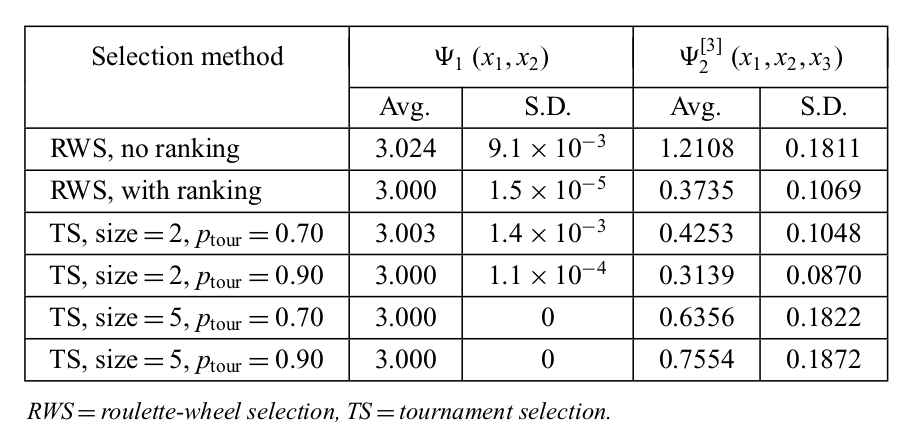

Se muestran los valores promedio del mejor ajuste para cada función de prueba. Los valores medios se calculan tomando 100 muestras en 30 ejecuciones del código. Los valores óptimos son $3.0$ para $\Psi_1(x_1, x_2)$ y $0.0$ para $\Psi_2^{[3]}(x_1, x_2, x_3)$

## Operador cruce

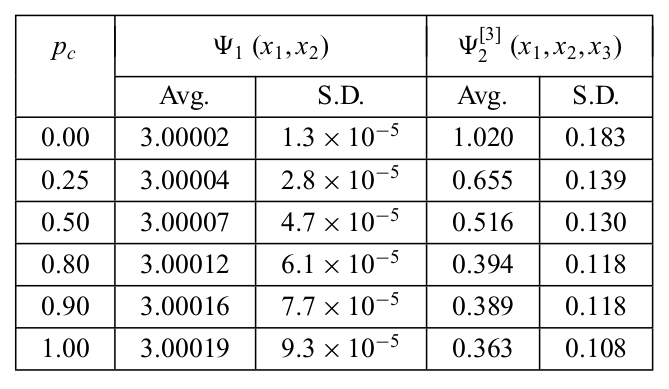

## Operador mutación

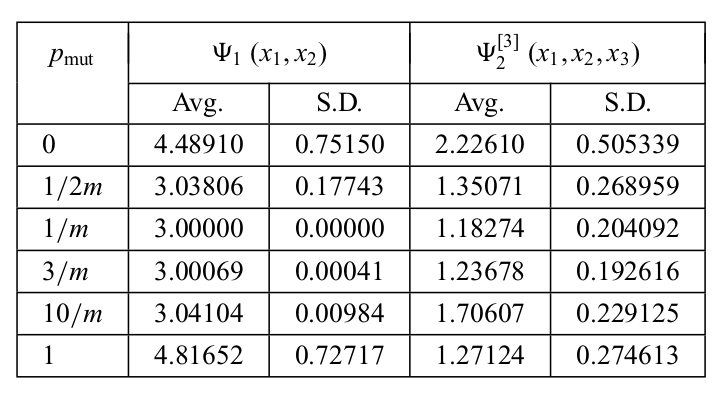

## Referencias
* M.Wahde (2008). Biologically Inspired Optimization Methods: An Introduction. WIT Press.
* Pang, T. (2006). An Introduction to Computational Physics. Cambridge: Cambridge University Press.